# Loading Libraries 

In [87]:
# Loading Libraries 

## data manipulation libraries
import numpy as np
import pandas as pd

## visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

## pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# What is Pandas?

Pandas is a library within the Python programming language and at the core is the idea of being able to store data and subsequently perform meaningful data analysis on said data. The stored data could be categorical or quantitative and can come from a variety of fields such as biology or business.

# How to Install Pandas
To install Pandas, you can use either Conda or Pip to do so. <br>

Since Pandas is apart of the Anaconda distribution you can install it with either Anaconda or Miniconda:
 - `conda install -c conda-forge pandas` <br>
 
If you prefer Pip: 
 - `pip install pandas` <br>
 
Once Pandas is installed, simply load the library by executing the following line of code: `import pandas as pd`. You technically can change the `pd` part to anything you would like, but it is convention to use `pd`. Therefore to call a Pandas method simply use `pd.name_of_method` e.g. `pd.DataFrame()`. 

# Two Data Structures in Pandas - Series and DataFrame
Within Pandas there are two primary data structures which are a Pandas Series and a Pandas DataFrame. A Pandas Series is a one-dimensional labeled array capable of holding any data types such as integers, strings, Python objects, etc. While a Pandas DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. When you think of a Pandas DataFrame you can think of an Excel Spreadsheet. <br>

Creating a Pandas Series: <br>
  - `pd.Series( data, index, dtype, name, ... )` with: <br>
  <br>
  
      - `data (iterable, dict, etc.)`: A Python dictionary, list, or a scalar value e.g. 5. 
      - `index (array-like or Index (1d))`: Index to use for created Pandas Series. Must be same length as data and will default to RangeIndex (0, 1, 2, 3, etc.) unless indexing information is provided.
      - `dtype (dtype)`: Datatype for the output series. Will be inferred if not provided.
      - `name (str)`: Name to give the Pandas Series.

In [88]:
# creating a Pandas Series with a Python dictionary
s_dict = { "Row 1": "baz", 
           "Row 2": ["foo", "bar"],
           "Row 3": 5, }
s = pd.Series( data = s_dict )
s

Row 1           baz
Row 2    [foo, bar]
Row 3             5
dtype: object

In [89]:
# creating a Pandas Series with a Python List
s_list = [ "foo", "bar", "baz", 1, 2, 3 ]

In [90]:
pd.Series( data = s_list )

0    foo
1    bar
2    baz
3      1
4      2
5      3
dtype: object

Creating a Pandas DataFrame: <br>
 - `pd.DataFrame( data, index, columns, dtype, ... )` with: <br>
 <br>

    - `data (iterable, dict, DataFrame)`: Being another Pandas DataFrame, a Pandas Series, 2-D numpy.ndarray, structured ndarray, or a dictionary
    - `index (index or array-like)`: Index to use for created Pandas DataFrame. Defaults to RangeIndex (0, 1, 2, 3, etc.) unless indexing information is provided. 
    - `columns (Index or array-like)`: Column names to use for the created Pandas DataFrame. Default to RangeIndex (0, 1, 2, 3, etc.) unless column names are provided. 
    - `dtype (dtype)`: Data type that is enforced, with only a single datatype being allowed. E.g. np.int64.
 
 

In [91]:
# creating a Pandas DataFrame with a Dictionary
df_dict = { "Column 1": np.linspace(0,10,3), 
            "Column 2": ["foo", "bar", "baz"], }
pd.DataFrame( data = df_dict ) # example with RangeIndex being used
#pd.DataFrame( data = df_dict, index = ["a", "b", "c"] ) # example with index information provided

,Column 1,Column 2
0,0.0,foo
1,5.0,bar
2,10.0,baz


In [92]:
# creating a Pandas DataFrame with a Pandas Series
df = pd.DataFrame( data = s )
df
# creating a Pandas DataFrame with a Pandas Series with Column Name
#df = pd.DataFrame( data = s, columns = ["Column Name"])
#df

,0
Row 1,baz
Row 2,"[foo, bar]"
Row 3,5


As a note, Pandas DataFrames are made up of Pandas Series. See below of example.

In [93]:
# creating and printing Pandas DataFrame
df = pd.DataFrame( data = df_dict )
df

,Column 1,Column 2
0,0.0,foo
1,5.0,bar
2,10.0,baz


In [94]:
# printing type of first column
print( type(df["Column 1"]) ) 
# printing type of second column
print( type(df["Column 2"]) )

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Just as shown above with the columns being Pandas Series. The rows are Pandas Series as well.

# Setting Root Dir

In [95]:
root_dir="./data"

# Reading in SLATE Benchmarking Data
Three datasets will be used throughout this walktrhough:
 - Summit benchmarks from September 2023 with minimum bandwidth with Spectrum MPI
 - Summit benchmarks from September 2023 with maximum bandwidth with Spectrum MPI
 
These datasets had the following `jsrun` flags used:
- `n32`
- `a1`
- `g3`
- `brs`

These datasets had the following SLATE flags used:
- `--origin h`
- `--target d`
- `--dim 8000,16000,32000,64000,96000,128000,256000`
- `--grid 8x4`
- `--repeat 3`
- `--type d`
- `--gemm`


In [96]:
# loading in benchmarking data to Pandas DataFrame
minbandwidth  = pd.read_csv(f"{root_dir}/2023_09_05_summit_gemm_n16_g96_jsrun_n32_a1_c21_g3_slate_nb896_oh_td_mininumbandwidth.csv")

In [97]:
# loading in benchmarking data to Pandas DataFrame
maxbandwidth = pd.read_csv(f"{root_dir}/2023_09_05_summit_gemm_n16_g96_jsrun_n32_a1_c21_g3_slate_nb896_oh_td.csv")

In [98]:
# adding extra metadata to each DataFrame loaded from above
minbandwidth["Bandwidth Tuning"] = "Bandwidth Tuning-No"

maxbandwidth["Bandwidth Tuning"] = "Bandwidth Tuning-Yes"

In [99]:
minbandwidth.head(3)

,type,origin,target,gemm,go,A,B,C,transA,transB,m,n,k,alpha,beta,nb,p,q,la,error,time(s),gflops,ref time (s),ref gflop/s,status,Bandwidth Tuning
0,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.240000e-16,0.3210,11.697,NA,NA,pass,Bandwidth Tuning-No
1,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.240000e-16,0.0243,154.733,NA,NA,pass,Bandwidth Tuning-No
2,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.270000e-16,0.0247,152.000,NA,NA,pass,Bandwidth Tuning-No


In [100]:
maxbandwidth.head(3)

,type,origin,target,gemm,go,A,B,C,transA,transB,m,n,k,alpha,beta,nb,p,q,la,error,time(s),gflops,ref time (s),ref gflop/s,status,Bandwidth Tuning
0,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.230000e-16,0.2730,13.755,NA,NA,pass,Bandwidth Tuning-Yes
1,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.250000e-16,0.0249,151.184,NA,NA,pass,Bandwidth Tuning-Yes
2,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.210000e-16,0.0249,150.812,NA,NA,pass,Bandwidth Tuning-Yes


# Using `pd.concat` to Combine Multiple DataFrames
`concat` will combine 2 or more `Pandas.DataFrames` along a particular axis. 

Syntax for `pd.concat()`:
```
pd.concat( objs, axis = 0, join = 'outer', ... )
```
With:
* `objs (list)`: a sequence or mapping of DataFrame objects
* `axis (int)`: axis to concatenate on, default is 0 ('index')
* `join (str)`: how to handle indexes on other axes, with two options being:
   * outer (default)
   * inner

`concat` will return return a `Pandas.DataFrame`, if at least one `DataFrame` is contained within `objs`. <br>
<br>

Below is an example to show two dataframes being concated together, which are: `minbandwidth` and `maxbandwidth`. To concate them all together, each will be put into the same list and then this list will be passed to the `objs` argument in `pd.concat`. <br>

A new single dataframe will be returned with the above three dataframes concated (combined) together. As a note, notice that the index does reset where each dataframe was combined at. This is due to `ignore_index` being assigned to `False` which is the default. If you would like for the index to be continous set `ignore_index = True`. Only due this if the concatenation axis does not have meaningful indexing information.

In [101]:
dfs_to_concat = [ minbandwidth, maxbandwidth ]

In [102]:
concat_df = pd.concat( objs = dfs_to_concat )

In [103]:
df = concat_df
df

,type,origin,target,gemm,go,A,B,C,transA,transB,m,n,k,alpha,beta,nb,p,q,la,error,time(s),gflops,ref time (s),ref gflop/s,status,Bandwidth Tuning
0,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.240000e-16,0.3210,11.697,NA,NA,pass,Bandwidth Tuning-No
1,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.240000e-16,0.0243,154.733,NA,NA,pass,Bandwidth Tuning-No
2,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.270000e-16,0.0247,152.000,NA,NA,pass,Bandwidth Tuning-No
3,d,host,dev,auto,col,1,1,1,notrans,notrans,8000,8000,8000,3.1+1.4i,2.7+1.7i,896,8,4,1,1.150000e-16,1.1380,899.559,NA,NA,pass,Bandwidth Tuning-No
4,d,host,dev,auto,col,1,1,1,notrans,notrans,8000,8000,8000,3.1+1.4i,2.7+1.7i,896,8,4,1,1.160000e-16,0.1220,8364.567,NA,NA,pass,Bandwidth Tuning-No
5,d,host,dev,auto,col,1,1,1,notrans,notrans,8000,8000,8000,3.1+1.4i,2.7+1.7i,896,8,4,1,1.150000e-16,0.1220,8400.978,NA,NA,pass,Bandwidth Tuning-No
6,d,host,dev,auto,col,1,1,1,notrans,notrans,16000,16000,16000,3.1+1.4i,2.7+1.7i,896,8,4,1,2.530000e-16,0.3130,26182.834,NA,NA,pass,Bandwidth Tuning-No
7,d,host,dev,auto,col,1,1,1,notrans,notrans,16000,16000,16000,3.1+1.4i,2.7+1.7i,896,8,4,1,2.550000e-16,0.3300,24825.788,NA,NA,pass,Bandwidth Tuning-No
8,d,host,dev,auto,col,1,1,1,notrans,notrans,16000,16000,16000,3.1+1.4i,2.7+1.7i,896,8,4,1,2.530000e-16,0.2990,27409.683,NA,NA,pass,Bandwidth Tuning-No
9,d,host,dev,auto,col,1,1,1,notrans,notrans,32000,32000,32000,3.1+1.4i,2.7+1.7i,896,8,4,1,2.460000e-16,0.8810,74351.437,NA,NA,pass,Bandwidth Tuning-No


## Pandas `.groupby()`
Pandas `groupby` is used to group large amounts of data and compute operations on these different groups. Often times `groupby` is used with either `.agg()` or `.apply()`. <br>

Syntax for `.groupby()`:
```
DataFrame.groupby( by = None, axis = 0, level = None, ... )
```
With:
* `by (list)`: being a mapping function, label, or list to group the DataFrame by
* `axis (int)`: split/group based on rows (0) or columns (1) with the default being rows (0)
* `level (int)`: if axis is a MultiIndex DataFrame, group by a particular level or levels

`.groupby()` will return a groupby object. The groupby object will return the name of the grouped `DataFrame` and the grouped `DataFrame` itself.

In [104]:
# example of using groupby on concat_df and grouping by "Date Ran On and Bandwidth Tuning"
grouped_df = concat_df.groupby( by = "Bandwidth Tuning" )
grouped_df

In [105]:
# printing individual grouped dataframes with display
for name, df in grouped_df:
    print(name)
    display(df.head(3))

Bandwidth Tuning-No


,type,origin,target,gemm,go,A,B,C,transA,transB,m,n,k,alpha,beta,nb,p,q,la,error,time(s),gflops,ref time (s),ref gflop/s,status,Bandwidth Tuning
0,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.240000e-16,0.3210,11.697,NA,NA,pass,Bandwidth Tuning-No
1,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.240000e-16,0.0243,154.733,NA,NA,pass,Bandwidth Tuning-No
2,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.270000e-16,0.0247,152.000,NA,NA,pass,Bandwidth Tuning-No


Bandwidth Tuning-Yes


,type,origin,target,gemm,go,A,B,C,transA,transB,m,n,k,alpha,beta,nb,p,q,la,error,time(s),gflops,ref time (s),ref gflop/s,status,Bandwidth Tuning
0,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.230000e-16,0.2730,13.755,NA,NA,pass,Bandwidth Tuning-Yes
1,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.250000e-16,0.0249,151.184,NA,NA,pass,Bandwidth Tuning-Yes
2,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.210000e-16,0.0249,150.812,NA,NA,pass,Bandwidth Tuning-Yes


In [106]:
# storing individual grouped dataframes with a list
df_list = []
for name, individual_df in grouped_df:
    df_list.append(individual_df)

In [107]:
df_list[0].head(3)

,type,origin,target,gemm,go,A,B,C,transA,transB,m,n,k,alpha,beta,nb,p,q,la,error,time(s),gflops,ref time (s),ref gflop/s,status,Bandwidth Tuning
0,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.240000e-16,0.3210,11.697,NA,NA,pass,Bandwidth Tuning-No
1,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.240000e-16,0.0243,154.733,NA,NA,pass,Bandwidth Tuning-No
2,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.270000e-16,0.0247,152.000,NA,NA,pass,Bandwidth Tuning-No


In [108]:
df_list[1].head(3)

,type,origin,target,gemm,go,A,B,C,transA,transB,m,n,k,alpha,beta,nb,p,q,la,error,time(s),gflops,ref time (s),ref gflop/s,status,Bandwidth Tuning
0,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.230000e-16,0.2730,13.755,NA,NA,pass,Bandwidth Tuning-Yes
1,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.250000e-16,0.0249,151.184,NA,NA,pass,Bandwidth Tuning-Yes
2,d,host,dev,auto,col,1,1,1,notrans,notrans,1234,1234,1234,3.1+1.4i,2.7+1.7i,896,8,4,1,1.210000e-16,0.0249,150.812,NA,NA,pass,Bandwidth Tuning-Yes


## Pandas `.agg()`
`.agg()` will aggregate using one or more operations over the specified axis. In more laymans terms, `.agg()` should be utilized when you have multiple entries. Examples of this could be: problem size (m), block size (nb), or origin/target. <br>

Syntax for `.agg()` when used without `.groupby()`:
```
DataFrame.agg( func = None, axis = 0, ...)
```
With:
* `func (func)`: user selected function to use for aggregating data within the DataFrame e.g. `np.median` or `np.mean`
* `axis (int)`: 
    * 0 or `index`: apply function to each column
    * 1 or `columns`: apply function to each row

`.agg()` will return a Pandas `Series` if a single function is provided or a Pandas `Dataframe` if multiple functions are provided. With the results of the aggregated operation over the specified axis being shown in either.<br>

As a note, I would suggest using `.agg()` with `.groupby()`, please see below section Pandas `.groupby.agg()`.

In [109]:
# selecting numeric columns only from minbandwidth DataFrame (A TypeError will appear if not done)
numeric_df = minbandwidth.select_dtypes( include = ['float64','int64'] )

In [110]:
numeric_df.agg( func = np.median, axis = 0)

A          1.000000e+00
B          1.000000e+00
C          1.000000e+00
m          4.800000e+04
n          4.800000e+04
k          4.800000e+04
nb         8.960000e+02
p          8.000000e+00
q          4.000000e+00
la         1.000000e+00
error      2.725000e-16
time(s)    1.995500e+00
gflops     1.281240e+05
dtype: float64

## Pandas  `.groupby().agg()`
Perform a groupby on a `DataFrame` and aggregate using one or more operations over the specified axis. A groupby could be performed on problem size (m), origin/target, or block size (nb). Once groupby is used, `.agg()` will aggregate our chosen operation over the specified groupby and axis.

Syntax for `.groupby().agg()`:
```
DataFrame.groupby( by = None, ... ).agg( func = None, ... )
```

With:
* `by (list)`: mapping, function, label or list to group the DataFrame by
* `func (func)`: function to use for aggregating the data e.g np.median or np.mean

In [111]:
# group data by problem size (m) and then aggregate values using np.median
minbandwidth.groupby( by = "m" ).agg(np.median)

,A,B,C,n,k,nb,p,q,la,error,time(s),gflops
m,,,,,,,,,,,,
1234,1.0,1.0,1.0,1234.0,1234.0,896.0,8.0,4.0,1.0,1.240000e-16,0.0247,152.000
8000,1.0,1.0,1.0,8000.0,8000.0,896.0,8.0,4.0,1.0,1.150000e-16,0.1220,8364.567
16000,1.0,1.0,1.0,16000.0,16000.0,896.0,8.0,4.0,1.0,2.530000e-16,0.3130,26182.834
32000,1.0,1.0,1.0,32000.0,32000.0,896.0,8.0,4.0,1.0,2.450000e-16,0.8680,75531.397
64000,1.0,1.0,1.0,64000.0,64000.0,896.0,8.0,4.0,1.0,2.900000e-16,2.8840,181794.900
96000,1.0,1.0,1.0,96000.0,96000.0,896.0,8.0,4.0,1.0,3.250000e-16,5.9710,296329.181
128000,1.0,1.0,1.0,128000.0,128000.0,896.0,8.0,4.0,1.0,3.870000e-16,10.2750,408193.070
256000,1.0,1.0,1.0,256000.0,256000.0,896.0,8.0,4.0,1.0,5.380000e-16,57.5550,582996.672


In [112]:
# group data by date ran on and problem size (m) and then aggregate values using np.median
concat_df.groupby( by = ["Bandwidth Tuning", "m"] ).agg(np.median)

A    B    C         n         k     nb    p  \
Bandwidth Tuning     m                                                       
Bandwidth Tuning-No  1234    1.0  1.0  1.0    1234.0    1234.0  896.0  8.0   
                     8000    1.0  1.0  1.0    8000.0    8000.0  896.0  8.0   
                     16000   1.0  1.0  1.0   16000.0   16000.0  896.0  8.0   
                     32000   1.0  1.0  1.0   32000.0   32000.0  896.0  8.0   
                     64000   1.0  1.0  1.0   64000.0   64000.0  896.0  8.0   
                     96000   1.0  1.0  1.0   96000.0   96000.0  896.0  8.0   
                     128000  1.0  1.0  1.0  128000.0  128000.0  896.0  8.0   
                     256000  1.0  1.0  1.0  256000.0  256000.0  896.0  8.0   
Bandwidth Tuning-Yes 1234    1.0  1.0  1.0    1234.0    1234.0  896.0  8.0   
                     8000    1.0  1.0  1.0    8000.0    8000.0  896.0  8.0   
                     16000   1.0  1.0  1.0   16000.0   16000.0  896.0  8.0   
                     32000   1.0  1.0  1.0   32000.0   32000.0  896.0  8.0   
                     64000   1.0  1.0  1.0   64000.0   64000.0  896.0  8.0   
                     96000   1.0  1.0  1.0   96000.0   96000.0  896.0  8.0   
                     128000  1.0  1.0  1.0  128000.0  128000.0  896.0  8.0   
                     256000  1.0  1.0  1.0  256000.0  256000.0  896.0  8.0   

                               q   la         error  time(s)      gflops  
Bandwidth Tuning     m                                                    
Bandwidth Tuning-No  1234    4.0  1.0  1.240000e-16   0.0247     152.000  
                     8000    4.0  1.0  1.150000e-16   0.1220    8364.567  
                     16000   4.0  1.0  2.530000e-16   0.3130   26182.834  
                     32000   4.0  1.0  2.450000e-16   0.8680   75531.397  
                     64000   4.0  1.0  2.900000e-16   2.8840  181794.900  
                     96000   4.0  1.0  3.250000e-16   5.9710  296329.181  
                     128000  4.0  1.0  3.870000e-16  10.2750  408193.070  
                     256000  4.0  1.0  5.380000e-16  57.5550  582996.672  
Bandwidth Tuning-Yes 1234    4.0  1.0  1.230000e-16   0.0249     150.812  
                     8000    4.0  1.0  1.150000e-16   0.1460    7023.600  
                     16000   4.0  1.0  2.540000e-16   0.2790   29379.451  
                     32000   4.0  1.0  2.460000e-16   0.7520   87184.866  
                     64000   4.0  1.0  2.910000e-16   2.4740  211916.993  
                     96000   4.0  1.0  3.260000e-16   5.0140  352923.771  
                     128000  4.0  1.0  3.860000e-16   8.7070  481714.192  
                     256000  4.0  1.0  5.380000e-16  60.1990  557391.223

## Pandas `.filter()`
Subset the dataframes rows or columns according to the specified index labels.

Syntax for `.filter()`:
```
DataFrame.filter( items = None, like = None, regex = None, axis = None )
```

With: 
* `items (list-like)`: keep labels from axis which are in items
* `like (str)`: keep the labels from the axis for which "like in label == True"
* `regex (str)`: keep the labels from the axis for which re.search( regex, label ) == True
* `axis`: axis to filter on: 0 or index or 1 or columns

Will return a subset of the DataFrame based on selected filters.

### Example of  `.filter()` with `items`
This example will look at `axis = 1` or the columns of the dataframe.

In [113]:
minbandwidth.filter( items = [ "origin", "target", "time(s)" ], axis = 1 ).head(4)

,origin,target,time(s)
0,host,dev,0.3210
1,host,dev,0.0243
2,host,dev,0.0247
3,host,dev,1.1380


### Example of `.filter()` with `like`
This example will look at `axis = 0` or the rows of the dataframe.

In [114]:
# creating example DataFrame
grouped_example_df = concat_df.groupby( [ "Bandwidth Tuning", "m" ] ).agg(np.median)

In [115]:
grouped_example_df.filter( like = "8000", axis = 0 )

A    B    C         n         k     nb    p  \
Bandwidth Tuning     m                                                       
Bandwidth Tuning-No  8000    1.0  1.0  1.0    8000.0    8000.0  896.0  8.0   
                     128000  1.0  1.0  1.0  128000.0  128000.0  896.0  8.0   
Bandwidth Tuning-Yes 8000    1.0  1.0  1.0    8000.0    8000.0  896.0  8.0   
                     128000  1.0  1.0  1.0  128000.0  128000.0  896.0  8.0   

                               q   la         error  time(s)      gflops  
Bandwidth Tuning     m                                                    
Bandwidth Tuning-No  8000    4.0  1.0  1.150000e-16    0.122    8364.567  
                     128000  4.0  1.0  3.870000e-16   10.275  408193.070  
Bandwidth Tuning-Yes 8000    4.0  1.0  1.150000e-16    0.146    7023.600  
                     128000  4.0  1.0  3.860000e-16    8.707  481714.192

### Example of `.filter()` with `regex`

In [116]:
# example with $, matches a string that ends with e
minbandwidth.filter( regex = "e$", axis = 1 ).head(5)

,type
0,d
1,d
2,d
3,d
4,d


In [117]:
# example with ^, matches any string that starts with e
minbandwidth.filter( regex = "^e", axis = 1).head(5)

,error
0,1.240000e-16
1,1.240000e-16
2,1.270000e-16
3,1.150000e-16
4,1.160000e-16


## Using `.iloc` and `.loc`
Both `.iloc` and `.loc` can be used to access a group of rows or columns within a `Pandas.DataFrame`. However, they do this  in two different ways. <br>

`.iloc` accesses a DataFrames groups of rows or columns by integer-location based indexing. Some inputs that can be used with `.iloc` are:
 * Integers, e.g. `5`
 * A list or array of integers, e.g. `[0, 1, 2, 3]`
 * A slice object with ints, e.g. `1:7`

`.loc` accesses a DataFrames groups of rows or columns by label(s) or a boolean list. Some inputs that can be used with `.loc` are: 
* A single label, e.g. `'a'`
* A list or array of labels, e.g. `['a', 'b', 'c']`
* A slice object with labels, e.g. `'a':'f'`

Both `iloc` and `loc` have similar syntax: 
   - `DataFrame.iloc[ select row by integer, select column by integer ]`
   - `DataFrame.loc[ select row by label, select column by label ]`

## Indexing a Pandas DataFrame with `.iloc`

### Accessing a Single Row with `.iloc`

In [118]:
row_number = 0
minbandwidth.iloc[ row_number, : ].head(10)

type             d
origin        host
target         dev
gemm          auto
go             col
A                1
B                1
C                1
transA     notrans
transB     notrans
Name: 0, dtype: object

### Accessing a Single Column with `.iloc`

In [119]:
column_number = 0
minbandwidth.iloc[ :, column_number ].head(10)

0    d
1    d
2    d
3    d
4    d
5    d
6    d
7    d
8    d
9    d
Name: type, dtype: object

### Accessing Multiple Rows and Columns with `.iloc`
Output will be in the same order that the list was passed to `.iloc` in.

In [120]:
rows = [1, 3]
columns = [20, 21]
minbandwidth.iloc[ rows, columns ]

,time(s),gflops
1,0.0243,154.733
3,1.1380,899.559


## Indexing a Pandas DataFrame with `.loc`

### Accessing a Single Row with `.loc`

In [121]:
# option 1 if an index is not set
select_rows = [ False,False,False,False,True,
                False,False,False,False,False,
                False,False,False,False,False,False,
                False,False,False,False,False, False,
                False, False ] 

In [122]:
minbandwidth.loc[ select_rows, ]

,type,origin,target,gemm,go,A,B,C,transA,transB,m,n,k,alpha,beta,nb,p,q,la,error,time(s),gflops,ref time (s),ref gflop/s,status,Bandwidth Tuning
4,d,host,dev,auto,col,1,1,1,notrans,notrans,8000,8000,8000,3.1+1.4i,2.7+1.7i,896,8,4,1,1.160000e-16,0.122,8364.567,NA,NA,pass,Bandwidth Tuning-No


In [123]:
# option 2 if an index is set 
example_df_loc = minbandwidth.set_index("m")
row_name = 128000
example_df_loc.loc[ row_name, ].head(20)

,type,origin,target,gemm,go,A,B,C,transA,transB,n,k,alpha,beta,nb,p,q,la,error,time(s),gflops,ref time (s),ref gflop/s,status,Bandwidth Tuning
m,,,,,,,,,,,,,,,,,,,,,,,,,
128000,d,host,dev,auto,col,1,1,1,notrans,notrans,128000,128000,3.1+1.4i,2.7+1.7i,896,8,4,1,3.870000e-16,10.275,408193.070,NA,NA,pass,Bandwidth Tuning-No
128000,d,host,dev,auto,col,1,1,1,notrans,notrans,128000,128000,3.1+1.4i,2.7+1.7i,896,8,4,1,3.860000e-16,10.293,407506.936,NA,NA,pass,Bandwidth Tuning-No
128000,d,host,dev,auto,col,1,1,1,notrans,notrans,128000,128000,3.1+1.4i,2.7+1.7i,896,8,4,1,3.870000e-16,10.158,412900.020,NA,NA,pass,Bandwidth Tuning-No


### Accessing a Single Column with `.loc`

In [124]:
column_name = ["time(s)"]
minbandwidth.loc[ :, column_name ].head(5)

,time(s)
0,0.3210
1,0.0243
2,0.0247
3,1.1380
4,0.1220


### Accessing Multiple Rows and Columns with `.loc`
Output will be in the same order that the list was passed to `.loc` in.

In [125]:
rows = [ 8000, 16000 ]
columns = [ "origin", "nb", "time(s)", "gflops" ]
example_df_loc.loc[ rows, columns ]

,origin,nb,time(s),gflops
m,,,,
8000,host,896,1.138,899.559
8000,host,896,0.122,8364.567
8000,host,896,0.122,8400.978
16000,host,896,0.313,26182.834
16000,host,896,0.330,24825.788
16000,host,896,0.299,27409.683


## Pandas `.melt`
Use `.melt` to unpivot a `Pandas.DataFrame` from wide to long format, optionally leaving identifiers set. An example of when this could be useful, is unpivoting a `Pandas.DataFrame` to long format to be used within a Seaborn histogram or boxplot. <br>

Syntax for `melt()`:
```
df.melt( id_vars = None, value_vars = None, var_name = None, ...)
```
With:
* `id_vars (list)`: columns(s) to use as identifier variables
* `value_vars (list)`: column(s) to unpivot
* `var_name (str)`: name to use for the 'variable' column

`melt` will return a unpivoted `Pandas.DataFrame`

In [126]:
df_melt=concat_df.melt( id_vars = ["Bandwidth Tuning"], 
                        value_vars = ["gflops"],
                        value_name = "Gflop(s)", )

In [127]:
df_melt.head(5)

,Bandwidth Tuning,variable,Gflop(s)
0,Bandwidth Tuning-No,gflops,11.697
1,Bandwidth Tuning-No,gflops,154.733
2,Bandwidth Tuning-No,gflops,152.000
3,Bandwidth Tuning-No,gflops,899.559
4,Bandwidth Tuning-No,gflops,8364.567


<Axes: xlabel='Bandwidth Tuning', ylabel='Gflop(s)'>

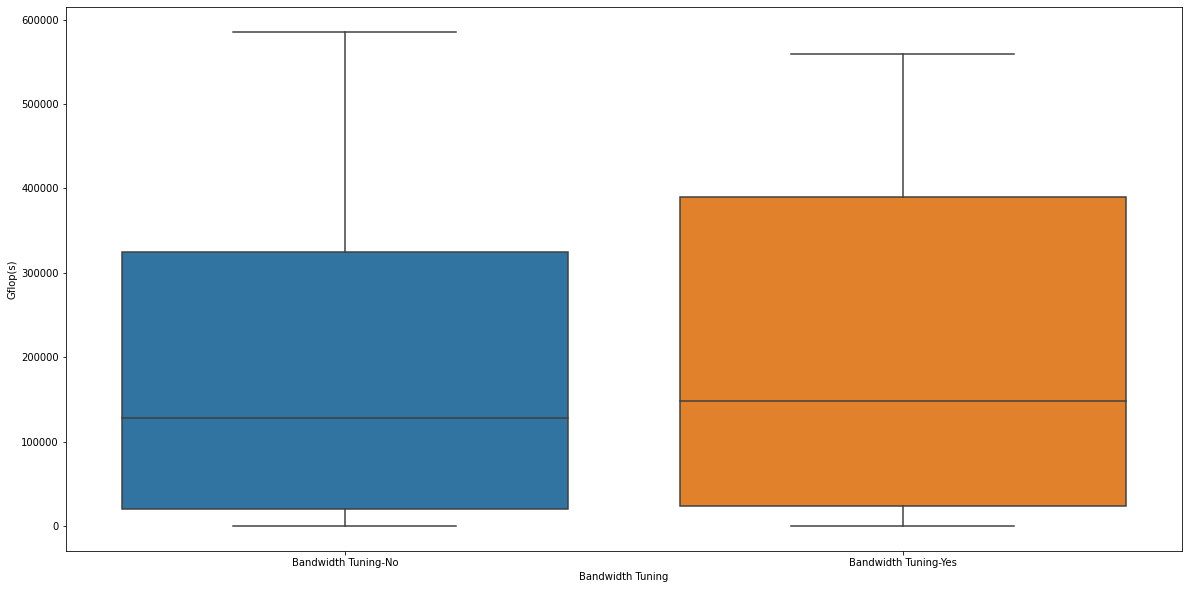

In [128]:
plt.figure( figsize = (20,10) )
sns.boxplot( df_melt, x = "Bandwidth Tuning", y = "Gflop(s)" )